In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')
from imutils import paths
from PIL import Image
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.io import read_image

Mounted at /content/MyDrive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2 
import os
import torch
from torchvision import transforms

In [3]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-03-11 07:20:05--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-03-11 07:20:05 (77.4 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [4]:
!pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import time 
from memory_profiler import memory_usage


In [44]:
imagePaths = list(paths.list_images('/content/MyDrive/MyDrive/imgs')) #замени на свою папку с изображениями

# ResNet50

In [36]:
# Old weights with accuracy 76.130%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# New weights with accuracy 80.858%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
resnet50(weights=ResNet50_Weights.DEFAULT)

# Strings are also supported
resnet50(weights="IMAGENET1K_V2")

# No weights - random initialization
resnet50(weights=None)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [37]:
# Initialize model
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)

# Set model to eval mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [38]:
#img = read_image("IMG_7171.JPG")
def recogRes50(img):

    # Step 1: Initialize model with the best available weights
    weights = ResNet50_Weights.DEFAULT
    model = resnet50(weights=weights)
    model.eval()

    # Step 2: Initialize the inference transforms
    preprocess = weights.transforms()

    # Step 3: Apply inference preprocessing transforms
    batch = preprocess(img).unsqueeze(0)

    out = model(batch)
    labels = weights.meta["categories"]
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    # print(f"Class № {index[0]} - {labels[index[0]]}: {percentage[index[0]].item():.1f}%")
    _, indices = torch.sort(out, descending=True)
    # for idx in indices[0][1:5]:
    #   print(f"Class № {idx} - {labels[idx]}: {percentage[idx].item():.1f}%")
    return percentage, labels, index, indices



# Test ResNet

/content/MyDrive/MyDrive/imgs/chickadee 2.jpg


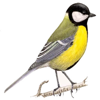

Class № 11 - goldfinch: 17.9%
Class № 19 - chickadee: 2.8%
Class № 10 - brambling: 1.0%
Class № 16 - bulbul: 0.8%
Class № 96 - toucan: 0.8%
--------------------------------
/content/MyDrive/MyDrive/imgs/chickadee 1.jpg


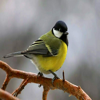

Class № 11 - goldfinch: 15.9%
Class № 19 - chickadee: 4.4%
Class № 16 - bulbul: 2.1%
Class № 10 - brambling: 0.7%
Class № 13 - junco: 0.4%
--------------------------------
/content/MyDrive/MyDrive/imgs/chickadee 9.jpg


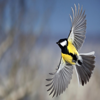

Class № 11 - goldfinch: 30.1%
Class № 19 - chickadee: 3.1%
Class № 10 - brambling: 1.1%
Class № 80 - black grouse: 1.1%
Class № 16 - bulbul: 0.8%
--------------------------------
/content/MyDrive/MyDrive/imgs/chickadee 6.jpg


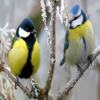

Class № 11 - goldfinch: 15.3%
Class № 19 - chickadee: 5.6%
Class № 96 - toucan: 1.0%
Class № 92 - bee eater: 0.7%
Class № 17 - jay: 0.7%
--------------------------------
/content/MyDrive/MyDrive/imgs/chickadee 3.jpg


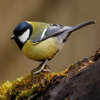

Class № 11 - goldfinch: 34.3%
Class № 19 - chickadee: 1.8%
Class № 17 - jay: 0.5%
Class № 10 - brambling: 0.5%
Class № 16 - bulbul: 0.5%
--------------------------------
/content/MyDrive/MyDrive/imgs/chickadee 8.jpg


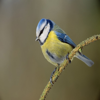

Class № 17 - jay: 32.9%
Class № 11 - goldfinch: 5.7%
Class № 19 - chickadee: 2.2%
Class № 16 - bulbul: 0.6%
Class № 10 - brambling: 0.6%
--------------------------------
/content/MyDrive/MyDrive/imgs/chickadee 4.jpg


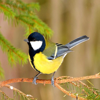

Class № 11 - goldfinch: 12.8%
Class № 19 - chickadee: 11.7%
Class № 16 - bulbul: 1.0%
Class № 10 - brambling: 0.4%
Class № 13 - junco: 0.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/chickadee 7.jpg


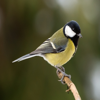

Class № 11 - goldfinch: 21.7%
Class № 19 - chickadee: 5.2%
Class № 10 - brambling: 0.5%
Class № 12 - house finch: 0.3%
Class № 16 - bulbul: 0.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/chickadee 5.jpg


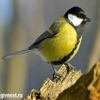

Class № 11 - goldfinch: 18.0%
Class № 19 - chickadee: 2.8%
Class № 16 - bulbul: 0.9%
Class № 20 - water ouzel: 0.8%
Class № 10 - brambling: 0.4%
--------------------------------
/content/MyDrive/MyDrive/imgs/chickadee 10.jpg


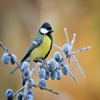

Class № 19 - chickadee: 36.6%
Class № 11 - goldfinch: 4.4%
Class № 16 - bulbul: 0.3%
Class № 13 - junco: 0.3%
Class № 17 - jay: 0.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 11.jpg


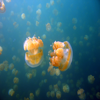

Class № 107 - jellyfish: 41.8%
Class № 928 - ice cream: 0.1%
Class № 950 - orange: 0.1%
Class № 687 - organ: 0.1%
Class № 470 - candle: 0.1%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 13.jpg


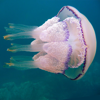

Class № 107 - jellyfish: 56.0%
Class № 108 - sea anemone: 0.2%
Class № 5 - electric ray: 0.2%
Class № 983 - scuba diver: 0.2%
Class № 452 - bonnet: 0.2%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 12.jpg


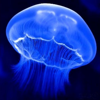

Class № 107 - jellyfish: 43.7%
Class № 749 - quill: 0.2%
Class № 714 - pick: 0.1%
Class № 352 - impala: 0.1%
Class № 417 - balloon: 0.1%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 14.jpg


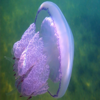

Class № 107 - jellyfish: 14.0%
Class № 327 - starfish: 0.7%
Class № 815 - spider web: 0.4%
Class № 115 - sea slug: 0.3%
Class № 971 - bubble: 0.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 16.jpg


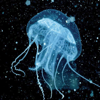

Class № 107 - jellyfish: 61.6%
Class № 644 - matchstick: 0.7%
Class № 827 - stove: 0.2%
Class № 605 - iPod: 0.1%
Class № 987 - corn: 0.1%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 15.jpg


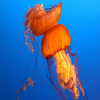

Class № 107 - jellyfish: 36.1%
Class № 108 - sea anemone: 0.1%
Class № 417 - balloon: 0.1%
Class № 358 - polecat: 0.1%
Class № 333 - hamster: 0.1%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 17.jpg


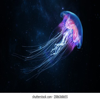

Class № 107 - jellyfish: 56.1%
Class № 971 - bubble: 0.1%
Class № 1 - goldfish: 0.1%
Class № 108 - sea anemone: 0.1%
Class № 329 - sea cucumber: 0.1%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 19.jpg


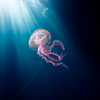

Class № 107 - jellyfish: 54.8%
Class № 121 - king crab: 0.3%
Class № 126 - isopod: 0.3%
Class № 33 - loggerhead: 0.3%
Class № 78 - tick: 0.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 18.jpg


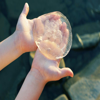

Class № 107 - jellyfish: 66.0%
Class № 971 - bubble: 3.9%
Class № 712 - Petri dish: 0.8%
Class № 5 - electric ray: 0.5%
Class № 633 - loupe: 0.4%
--------------------------------
/content/MyDrive/MyDrive/imgs/jellyfish 20.jpg


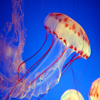

Class № 107 - jellyfish: 37.8%
Class № 701 - parachute: 0.2%
Class № 111 - nematode: 0.2%
Class № 417 - balloon: 0.1%
Class № 687 - organ: 0.1%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 23.jpg


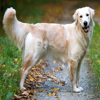

Class № 207 - golden retriever: 32.0%
Class № 216 - clumber: 4.4%
Class № 222 - kuvasz: 2.1%
Class № 208 - Labrador retriever: 1.0%
Class № 205 - flat-coated retriever: 0.9%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 21.jpg


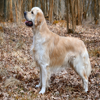

Class № 207 - golden retriever: 22.5%
Class № 208 - Labrador retriever: 3.9%
Class № 222 - kuvasz: 3.2%
Class № 205 - flat-coated retriever: 1.1%
Class № 216 - clumber: 0.6%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 22.jpg


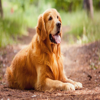

Class № 207 - golden retriever: 34.5%
Class № 852 - tennis ball: 1.0%
Class № 205 - flat-coated retriever: 0.8%
Class № 213 - Irish setter: 0.6%
Class № 238 - Greater Swiss Mountain dog: 0.4%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 24.jpg


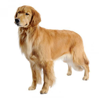

Class № 207 - golden retriever: 59.0%
Class № 220 - Sussex spaniel: 1.9%
Class № 206 - curly-coated retriever: 0.9%
Class № 205 - flat-coated retriever: 0.9%
Class № 208 - Labrador retriever: 0.5%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 26.jpg


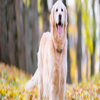

Class № 207 - golden retriever: 46.7%
Class № 205 - flat-coated retriever: 1.1%
Class № 222 - kuvasz: 0.9%
Class № 208 - Labrador retriever: 0.7%
Class № 216 - clumber: 0.6%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 25.jpg


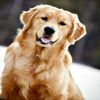

Class № 207 - golden retriever: 45.3%
Class № 205 - flat-coated retriever: 1.3%
Class № 852 - tennis ball: 1.0%
Class № 208 - Labrador retriever: 0.6%
Class № 216 - clumber: 0.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 27.jpg


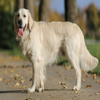

Class № 207 - golden retriever: 21.9%
Class № 216 - clumber: 4.1%
Class № 205 - flat-coated retriever: 1.0%
Class № 222 - kuvasz: 0.9%
Class № 220 - Sussex spaniel: 0.6%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 28.jpg


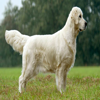

Class № 216 - clumber: 34.9%
Class № 207 - golden retriever: 1.8%
Class № 222 - kuvasz: 1.8%
Class № 220 - Sussex spaniel: 1.4%
Class № 169 - borzoi: 1.0%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 30.jpg


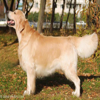

Class № 207 - golden retriever: 45.1%
Class № 220 - Sussex spaniel: 2.4%
Class № 216 - clumber: 2.2%
Class № 208 - Labrador retriever: 2.1%
Class № 206 - curly-coated retriever: 2.0%
--------------------------------
/content/MyDrive/MyDrive/imgs/golden retriever 29.jpg


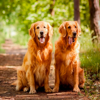

Class № 207 - golden retriever: 33.8%
Class № 205 - flat-coated retriever: 1.7%
Class № 852 - tennis ball: 1.7%
Class № 213 - Irish setter: 1.6%
Class № 797 - sleeping bag: 0.5%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 31.jpg


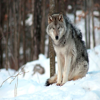

Class № 269 - timber wolf: 30.2%
Class № 272 - coyote: 4.9%
Class № 270 - white wolf: 4.3%
Class № 271 - red wolf: 3.2%
Class № 274 - dhole: 0.7%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 33.jpg


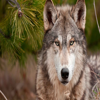

Class № 269 - timber wolf: 29.1%
Class № 273 - dingo: 9.8%
Class № 271 - red wolf: 4.5%
Class № 270 - white wolf: 3.1%
Class № 272 - coyote: 1.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 34.jpg


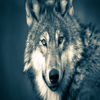

Class № 269 - timber wolf: 22.5%
Class № 273 - dingo: 11.4%
Class № 270 - white wolf: 6.1%
Class № 271 - red wolf: 3.9%
Class № 274 - dhole: 1.4%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 32.jpg


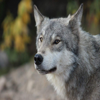

Class № 269 - timber wolf: 46.4%
Class № 270 - white wolf: 2.3%
Class № 272 - coyote: 1.5%
Class № 271 - red wolf: 1.4%
Class № 273 - dingo: 1.0%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 35.jpg


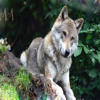

Class № 269 - timber wolf: 36.2%
Class № 271 - red wolf: 11.0%
Class № 273 - dingo: 4.1%
Class № 272 - coyote: 2.9%
Class № 270 - white wolf: 2.7%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 38.jpg


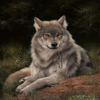

Class № 269 - timber wolf: 32.2%
Class № 271 - red wolf: 5.2%
Class № 270 - white wolf: 4.7%
Class № 272 - coyote: 3.3%
Class № 273 - dingo: 2.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 36.jpg


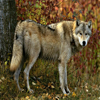

Class № 269 - timber wolf: 55.2%
Class № 272 - coyote: 2.6%
Class № 270 - white wolf: 2.5%
Class № 271 - red wolf: 2.2%
Class № 280 - grey fox: 0.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 37.jpg


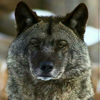

Class № 273 - dingo: 16.7%
Class № 269 - timber wolf: 9.4%
Class № 271 - red wolf: 9.3%
Class № 274 - dhole: 6.9%
Class № 174 - Norwegian elkhound: 3.5%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 40.jpg


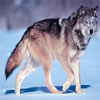

Class № 269 - timber wolf: 30.4%
Class № 270 - white wolf: 6.1%
Class № 271 - red wolf: 4.9%
Class № 273 - dingo: 3.3%
Class № 272 - coyote: 1.9%
--------------------------------
/content/MyDrive/MyDrive/imgs/timber wolf 39.jpg


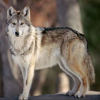

Class № 269 - timber wolf: 33.7%
Class № 271 - red wolf: 11.1%
Class № 270 - white wolf: 3.8%
Class № 272 - coyote: 2.9%
Class № 273 - dingo: 2.6%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 41.jpg


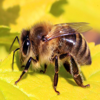

Class № 309 - bee: 38.2%
Class № 308 - fly: 0.6%
Class № 599 - honeycomb: 0.5%
Class № 410 - apiary: 0.4%
Class № 946 - cardoon: 0.4%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 42.jpg


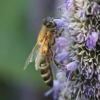

Class № 309 - bee: 46.2%
Class № 946 - cardoon: 2.6%
Class № 599 - honeycomb: 0.5%
Class № 308 - fly: 0.4%
Class № 410 - apiary: 0.4%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 43.jpg


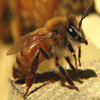

Class № 309 - bee: 42.1%
Class № 308 - fly: 1.0%
Class № 599 - honeycomb: 0.6%
Class № 410 - apiary: 0.3%
Class № 946 - cardoon: 0.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 45.jpg


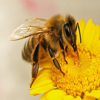

Class № 309 - bee: 34.0%
Class № 308 - fly: 0.6%
Class № 946 - cardoon: 0.4%
Class № 599 - honeycomb: 0.4%
Class № 410 - apiary: 0.3%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 44.jpg


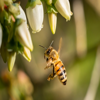

Class № 309 - bee: 66.6%
Class № 304 - leaf beetle: 0.4%
Class № 308 - fly: 0.4%
Class № 599 - honeycomb: 0.3%
Class № 410 - apiary: 0.2%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 46.jpg


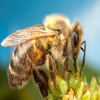

Class № 309 - bee: 38.7%
Class № 946 - cardoon: 1.3%
Class № 308 - fly: 0.9%
Class № 599 - honeycomb: 0.2%
Class № 410 - apiary: 0.2%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 48.jpg


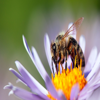

Class № 309 - bee: 43.9%
Class № 946 - cardoon: 1.1%
Class № 308 - fly: 0.6%
Class № 599 - honeycomb: 0.2%
Class № 303 - long-horned beetle: 0.2%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 49.jpg


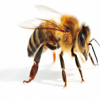

Class № 309 - bee: 27.6%
Class № 599 - honeycomb: 1.4%
Class № 308 - fly: 0.7%
Class № 410 - apiary: 0.6%
Class № 946 - cardoon: 0.6%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 50.jpg


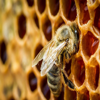

Class № 309 - bee: 26.0%
Class № 599 - honeycomb: 17.9%
Class № 410 - apiary: 8.3%
Class № 946 - cardoon: 0.2%
Class № 308 - fly: 0.2%
--------------------------------
/content/MyDrive/MyDrive/imgs/bee 51.jpg


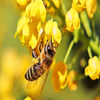

Class № 309 - bee: 26.3%
Class № 984 - rapeseed: 6.9%
Class № 599 - honeycomb: 2.1%
Class № 410 - apiary: 1.4%
Class № 308 - fly: 0.4%
--------------------------------
Top-1 accuracy - 0.78
Top-5 accuracy - 1.0
Time 39.83
Memory 1522.20 bytes


In [46]:
start = time.time()
count1, count5 = 0, 0
for imgPath in imagePaths:
  flag = 0
  print(imgPath)
  img = read_image(imgPath)
  img_open = Image.open(imgPath).convert('RGB')
  display(img_open.resize((100, 100)))

  percentage, labels, index, indices = recogRes50(img)
  print(f"Class № {index[0]} - {labels[index[0]]}: {percentage[index[0]].item():.1f}%")
  if labels[index[0]] in imgPath:
    flag = 1
    count1 += 1
    count5 += 1
  for idx in indices[0][1:5]:
    if flag == 0 and labels[idx] in imgPath:
      flag = 1
      count5 += 1
    print(f"Class № {idx} - {labels[idx]}: {percentage[idx].item():.1f}%")
  print("--------------------------------")

print('Top-1 accuracy -', count1 / 50)
print('Top-5 accuracy -', count5 / 50)
print(f"Time {time.time() - start:.2f}")
print(f"Memory {memory_usage()[0]:.2f} bytes")

# AlexNet

In [47]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [48]:
def recogAN(img):
  input_image = Image.open(img)
  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)
  # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
  #print(output[0])
  # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  # Read the categories
  with open("imagenet_classes.txt", "r") as f:
      categories = [s.strip() for s in f.readlines()]
  # Show top categories per image
  top5_prob, top5_catid = torch.topk(probabilities, 5)

  return categories, top5_catid, top5_prob

# Test AlexNet

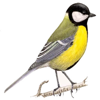

Class goldfinch 98.8%
Class bee eater 0.8%
Class bulbul 0.4%
Class toucan 0.0%
Class jacamar 0.0%
--------------------------------


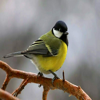

Class goldfinch 70.2%
Class chickadee 25.9%
Class bulbul 3.2%
Class jay 0.4%
Class brambling 0.1%
--------------------------------


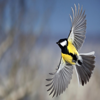

Class magpie 36.2%
Class goldfinch 31.6%
Class drake 8.1%
Class prairie chicken 5.8%
Class kite 4.5%
--------------------------------


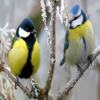

Class chickadee 64.0%
Class jay 20.6%
Class goldfinch 11.9%
Class toucan 1.2%
Class indri 1.1%
--------------------------------


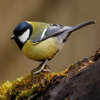

Class chickadee 47.5%
Class magpie 40.5%
Class goldfinch 6.8%
Class jay 5.0%
Class bulbul 0.0%
--------------------------------


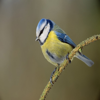

Class jay 69.6%
Class chickadee 15.5%
Class goldfinch 13.1%
Class bee eater 1.2%
Class indigo bunting 0.3%
--------------------------------


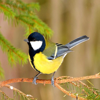

Class magpie 98.2%
Class chickadee 1.4%
Class goldfinch 0.2%
Class toucan 0.1%
Class hornbill 0.0%
--------------------------------


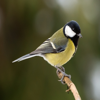

Class chickadee 99.5%
Class magpie 0.4%
Class bulbul 0.1%
Class goldfinch 0.0%
Class water ouzel 0.0%
--------------------------------


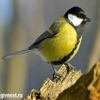

Class goldfinch 95.0%
Class chickadee 4.5%
Class bulbul 0.3%
Class jacamar 0.1%
Class toucan 0.1%
--------------------------------


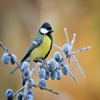

Class chickadee 90.0%
Class jay 7.8%
Class magpie 1.0%
Class goldfinch 0.9%
Class brambling 0.2%
--------------------------------


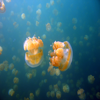

Class jellyfish 99.9%
Class anemone fish 0.0%
Class sea anemone 0.0%
Class sea slug 0.0%
Class loggerhead 0.0%
--------------------------------


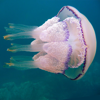

Class loggerhead 35.4%
Class puffer 12.2%
Class stingray 11.6%
Class electric ray 6.3%
Class tiger shark 4.5%
--------------------------------


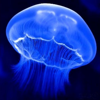

Class jellyfish 100.0%
Class shower cap 0.0%
Class matchstick 0.0%
Class Petri dish 0.0%
Class isopod 0.0%
--------------------------------


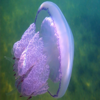

Class bubble 91.0%
Class jellyfish 4.6%
Class Petri dish 1.5%
Class bucket 0.3%
Class golf ball 0.3%
--------------------------------


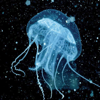

Class jellyfish 98.5%
Class isopod 0.6%
Class shower cap 0.5%
Class bubble 0.1%
Class leatherback turtle 0.1%
--------------------------------


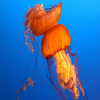

Class jellyfish 100.0%
Class goldfish 0.0%
Class nail 0.0%
Class jack-o'-lantern 0.0%
Class balloon 0.0%
--------------------------------


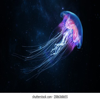

Class jellyfish 98.9%
Class bubble 0.3%
Class quill 0.3%
Class chambered nautilus 0.2%
Class grey whale 0.1%
--------------------------------


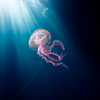

Class jellyfish 99.3%
Class chambered nautilus 0.3%
Class garden spider 0.1%
Class barn spider 0.1%
Class scuba diver 0.0%
--------------------------------


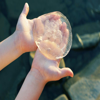

Class jellyfish 43.6%
Class conch 12.1%
Class bubble 12.1%
Class electric ray 8.7%
Class puffer 3.1%
--------------------------------


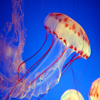

Class jellyfish 99.2%
Class balloon 0.1%
Class parachute 0.1%
Class goldfish 0.1%
Class lionfish 0.0%
--------------------------------


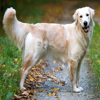

Class English setter 61.6%
Class clumber 15.1%
Class golden retriever 7.6%
Class borzoi 5.4%
Class Brittany spaniel 2.9%
--------------------------------


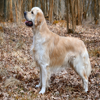

Class golden retriever 50.9%
Class English setter 44.8%
Class Brittany spaniel 1.4%
Class borzoi 0.7%
Class cocker spaniel 0.5%
--------------------------------


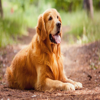

Class golden retriever 97.3%
Class cocker spaniel 1.7%
Class tennis ball 0.5%
Class Irish setter 0.3%
Class Sussex spaniel 0.1%
--------------------------------


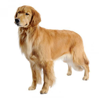

Class golden retriever 99.2%
Class Sussex spaniel 0.3%
Class Saluki 0.2%
Class Tibetan mastiff 0.1%
Class Afghan hound 0.1%
--------------------------------


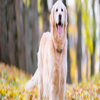

Class golden retriever 79.4%
Class kuvasz 3.4%
Class cocker spaniel 3.2%
Class clumber 2.1%
Class Great Pyrenees 2.0%
--------------------------------


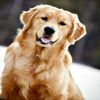

Class golden retriever 99.3%
Class cocker spaniel 0.4%
Class tennis ball 0.1%
Class Tibetan mastiff 0.1%
Class Sussex spaniel 0.1%
--------------------------------


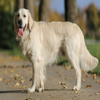

Class clumber 95.7%
Class English setter 1.1%
Class Sussex spaniel 0.7%
Class Great Pyrenees 0.7%
Class golden retriever 0.5%
--------------------------------


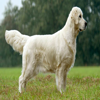

Class clumber 73.7%
Class English setter 14.0%
Class Sealyham terrier 6.7%
Class Sussex spaniel 1.9%
Class golden retriever 0.7%
--------------------------------


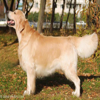

Class golden retriever 43.1%
Class Dandie Dinmont 7.4%
Class Irish wolfhound 6.7%
Class Afghan hound 5.5%
Class Great Pyrenees 3.0%
--------------------------------


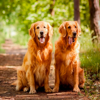

Class golden retriever 96.9%
Class Irish setter 1.6%
Class Sussex spaniel 0.7%
Class cocker spaniel 0.4%
Class Tibetan mastiff 0.1%
--------------------------------


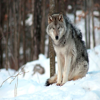

Class timber wolf 79.5%
Class red wolf 16.6%
Class coyote 2.7%
Class lynx 0.6%
Class white wolf 0.3%
--------------------------------


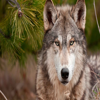

Class timber wolf 81.7%
Class red wolf 9.1%
Class dingo 4.2%
Class coyote 2.1%
Class white wolf 2.1%
--------------------------------


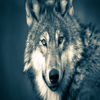

Class timber wolf 51.6%
Class coyote 22.5%
Class white wolf 9.2%
Class red wolf 8.6%
Class malamute 2.7%
--------------------------------


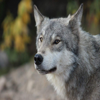

Class timber wolf 70.2%
Class dingo 9.1%
Class coyote 7.0%
Class white wolf 6.5%
Class red wolf 6.5%
--------------------------------


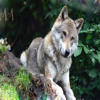

Class timber wolf 61.4%
Class red wolf 27.9%
Class coyote 8.6%
Class wallaby 1.1%
Class white wolf 0.4%
--------------------------------


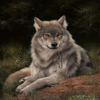

Class timber wolf 55.1%
Class coyote 14.7%
Class white wolf 14.2%
Class red wolf 11.1%
Class dhole 2.1%
--------------------------------


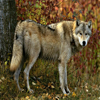

Class timber wolf 85.1%
Class red wolf 6.7%
Class coyote 4.1%
Class white wolf 1.3%
Class malamute 0.9%
--------------------------------


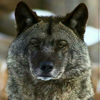

Class wallaby 83.5%
Class Norwegian elkhound 15.0%
Class timber wolf 0.6%
Class red wolf 0.3%
Class dingo 0.2%
--------------------------------


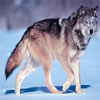

Class timber wolf 90.3%
Class red wolf 6.9%
Class coyote 1.9%
Class white wolf 0.5%
Class Eskimo dog 0.2%
--------------------------------


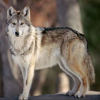

Class timber wolf 58.4%
Class red wolf 30.2%
Class coyote 10.7%
Class white wolf 0.4%
Class malamute 0.2%
--------------------------------


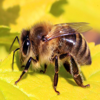

Class bee 99.7%
Class fly 0.3%
Class wolf spider 0.0%
Class Brabancon griffon 0.0%
Class ant 0.0%
--------------------------------


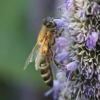

Class bee 98.2%
Class fly 1.1%
Class long-horned beetle 0.2%
Class leafhopper 0.1%
Class cardoon 0.1%
--------------------------------


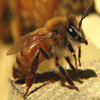

Class bee 99.9%
Class fly 0.0%
Class tarantula 0.0%
Class wolf spider 0.0%
Class damselfly 0.0%
--------------------------------


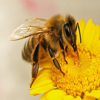

Class bee 99.5%
Class fly 0.5%
Class tarantula 0.0%
Class Brabancon griffon 0.0%
Class Leonberg 0.0%
--------------------------------


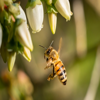

Class bee 79.1%
Class long-horned beetle 5.2%
Class fly 3.2%
Class ant 2.1%
Class dragonfly 1.5%
--------------------------------


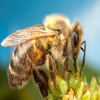

Class tarantula 87.4%
Class bee 11.0%
Class fly 0.8%
Class barn spider 0.4%
Class wolf spider 0.2%
--------------------------------


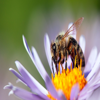

Class bee 90.2%
Class fly 8.6%
Class cardoon 0.4%
Class admiral 0.3%
Class long-horned beetle 0.1%
--------------------------------


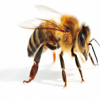

Class bee 90.6%
Class red fox 5.8%
Class tarantula 1.2%
Class fly 1.0%
Class barn spider 0.3%
--------------------------------


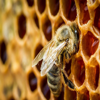

Class honeycomb 71.9%
Class bee 21.6%
Class apiary 4.8%
Class wolf spider 0.3%
Class cricket 0.2%
--------------------------------


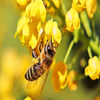

Class bee 74.2%
Class honeycomb 16.9%
Class ladybug 1.9%
Class rapeseed 1.8%
Class long-horned beetle 1.7%
--------------------------------
Top-1 accuracy - 0.72
Top-5 accuracy - 0.94
Time 14.36
Memory 4068.94 bytes


In [49]:
start = time.time()
count1, count5 = 0, 0
for imgPath in imagePaths:
  # img = read_image(imgPath)
  img_open = Image.open(imgPath).convert('RGB')
  display(img_open.resize((100, 100)))

  categories, top5_catid, top5_prob = recogAN(imgPath)
  for i in range(top5_prob.size(0)):
    if i == 0 and categories[top5_catid[i]] in imgPath:
      count1 += 1
      count5 += 1
    elif categories[top5_catid[i]] in imgPath:
      count5 += 1
    print(f"Class {categories[top5_catid[i]]} {100 * top5_prob[i].item():.1f}%")
  print("--------------------------------")

print('Top-1 accuracy -', count1 / 50)
print('Top-5 accuracy -', count5 / 50)
print(f"Time {time.time() - start:.2f}")
print(f"Memory {memory_usage()[0]:.2f} bytes")

# GoogLeNet

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()

In [51]:
def recogGLN(img):  
  input_image = Image.open(img)
  preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)
  # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
  #print(output[0])
  # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
  probabilities = torch.nn.functional.softmax(output[0], dim=0)
  
  
  with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
  # Show top categories per image
  top5_prob, top5_catid = torch.topk(probabilities, 5)


  return categories, top5_catid, top5_prob

# Test GoogLeNet

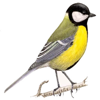

Class goldfinch 31.5%
Class brambling 5.7%
Class chickadee 3.7%
Class robin 3.6%
Class Windsor tie 0.6%
--------------------------------


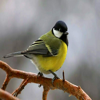

Class chickadee 10.1%
Class brambling 2.8%
Class goldfinch 2.1%
Class whistle 0.9%
Class robin 0.6%
--------------------------------


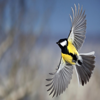

Class goldfinch 28.3%
Class chickadee 11.4%
Class prairie chicken 5.0%
Class bee eater 2.5%
Class king penguin 2.1%
--------------------------------


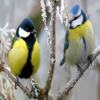

Class chickadee 43.6%
Class bee eater 31.2%
Class goldfinch 8.4%
Class brambling 2.2%
Class jay 2.0%
--------------------------------


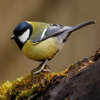

Class chickadee 63.4%
Class water ouzel 1.3%
Class brambling 0.7%
Class goldfinch 0.7%
Class safe 0.6%
--------------------------------


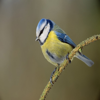

Class chickadee 14.6%
Class brambling 6.2%
Class bee eater 5.0%
Class goldfinch 3.8%
Class jay 3.1%
--------------------------------


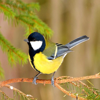

Class chickadee 76.5%
Class goldfinch 0.7%
Class magpie 0.5%
Class backpack 0.3%
Class safe 0.3%
--------------------------------


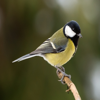

Class chickadee 75.5%
Class goldfinch 2.6%
Class brambling 1.4%
Class bulbul 0.5%
Class magpie 0.5%
--------------------------------


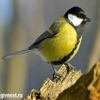

Class chickadee 75.5%
Class bee eater 0.6%
Class brambling 0.5%
Class goldfinch 0.5%
Class safe 0.4%
--------------------------------


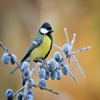

Class chickadee 14.7%
Class goldfinch 8.8%
Class brambling 3.0%
Class jacamar 2.0%
Class bee eater 1.7%
--------------------------------


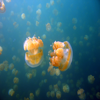

Class jellyfish 98.7%
Class coral reef 0.6%
Class anemone fish 0.2%
Class sea slug 0.1%
Class scuba diver 0.1%
--------------------------------


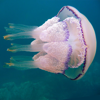

Class jellyfish 70.4%
Class bonnet 1.0%
Class chambered nautilus 0.7%
Class knot 0.6%
Class hip 0.6%
--------------------------------


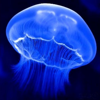

Class jellyfish 99.9%
Class matchstick 0.0%
Class chambered nautilus 0.0%
Class shower cap 0.0%
Class isopod 0.0%
--------------------------------


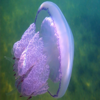

Class jellyfish 90.8%
Class bubble 1.3%
Class balloon 0.8%
Class great white shark 0.5%
Class hip 0.3%
--------------------------------


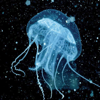

Class jellyfish 99.8%
Class isopod 0.1%
Class flatworm 0.0%
Class nematode 0.0%
Class shower cap 0.0%
--------------------------------


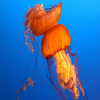

Class jellyfish 99.9%
Class parachute 0.0%
Class spoonbill 0.0%
Class macaw 0.0%
Class nematode 0.0%
--------------------------------


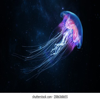

Class jellyfish 99.3%
Class nematode 0.2%
Class volcano 0.0%
Class matchstick 0.0%
Class bubble 0.0%
--------------------------------


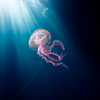

Class jellyfish 99.9%
Class loggerhead 0.0%
Class chambered nautilus 0.0%
Class isopod 0.0%
Class coral reef 0.0%
--------------------------------


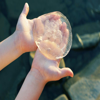

Class jellyfish 84.0%
Class electric ray 3.7%
Class Petri dish 1.1%
Class bubble 1.0%
Class isopod 1.0%
--------------------------------


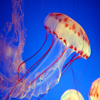

Class jellyfish 98.4%
Class parachute 1.4%
Class chambered nautilus 0.0%
Class maypole 0.0%
Class quill 0.0%
--------------------------------


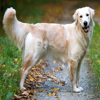

Class golden retriever 65.3%
Class English setter 6.7%
Class clumber 5.7%
Class kuvasz 4.0%
Class Saluki 2.7%
--------------------------------


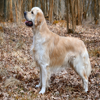

Class golden retriever 58.8%
Class English setter 6.8%
Class Labrador retriever 6.6%
Class kuvasz 2.7%
Class Great Pyrenees 1.9%
--------------------------------


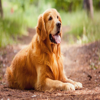

Class golden retriever 88.2%
Class Irish setter 2.4%
Class Brittany spaniel 0.8%
Class Labrador retriever 0.6%
Class Welsh springer spaniel 0.4%
--------------------------------


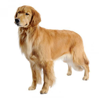

Class golden retriever 82.3%
Class Labrador retriever 1.1%
Class Saluki 0.9%
Class flat-coated retriever 0.5%
Class English setter 0.5%
--------------------------------


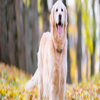

Class golden retriever 58.6%
Class kuvasz 4.8%
Class Brittany spaniel 4.4%
Class English setter 4.1%
Class Labrador retriever 3.0%
--------------------------------


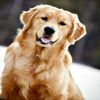

Class golden retriever 93.1%
Class Labrador retriever 2.9%
Class kuvasz 1.2%
Class Tibetan mastiff 0.1%
Class cocker spaniel 0.1%
--------------------------------


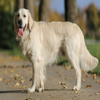

Class golden retriever 72.7%
Class kuvasz 7.4%
Class clumber 2.9%
Class borzoi 2.8%
Class Great Pyrenees 2.5%
--------------------------------


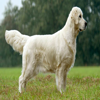

Class clumber 87.8%
Class Sussex spaniel 2.7%
Class golden retriever 1.7%
Class Labrador retriever 1.4%
Class English setter 0.8%
--------------------------------


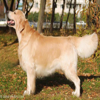

Class golden retriever 64.8%
Class Labrador retriever 8.2%
Class clumber 4.9%
Class English setter 1.7%
Class kuvasz 1.3%
--------------------------------


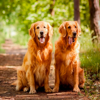

Class golden retriever 96.5%
Class Labrador retriever 1.0%
Class kuvasz 0.3%
Class Irish setter 0.2%
Class flat-coated retriever 0.1%
--------------------------------


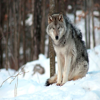

Class timber wolf 83.7%
Class coyote 4.6%
Class red wolf 2.8%
Class white wolf 2.1%
Class Eskimo dog 1.2%
--------------------------------


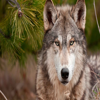

Class timber wolf 74.4%
Class red wolf 10.8%
Class white wolf 5.8%
Class coyote 2.9%
Class dingo 2.6%
--------------------------------


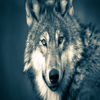

Class timber wolf 74.5%
Class red wolf 11.1%
Class white wolf 5.2%
Class coyote 1.4%
Class Eskimo dog 0.7%
--------------------------------


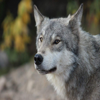

Class timber wolf 53.0%
Class coyote 14.9%
Class red wolf 12.1%
Class dingo 2.7%
Class white wolf 1.9%
--------------------------------


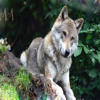

Class timber wolf 62.1%
Class red wolf 16.4%
Class coyote 12.9%
Class white wolf 2.0%
Class dingo 1.7%
--------------------------------


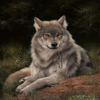

Class timber wolf 79.0%
Class coyote 3.4%
Class red wolf 3.3%
Class white wolf 3.3%
Class Eskimo dog 1.8%
--------------------------------


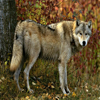

Class timber wolf 95.4%
Class red wolf 1.8%
Class coyote 1.2%
Class white wolf 0.7%
Class Eskimo dog 0.1%
--------------------------------


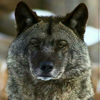

Class Norwegian elkhound 16.4%
Class red wolf 7.8%
Class timber wolf 6.9%
Class coyote 6.9%
Class dingo 4.6%
--------------------------------


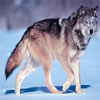

Class timber wolf 78.3%
Class red wolf 7.8%
Class coyote 2.5%
Class malamute 2.0%
Class white wolf 1.8%
--------------------------------


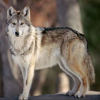

Class timber wolf 68.4%
Class red wolf 13.1%
Class coyote 10.3%
Class white wolf 2.4%
Class dingo 0.7%
--------------------------------


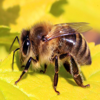

Class bee 98.8%
Class tarantula 0.8%
Class honeycomb 0.2%
Class apiary 0.1%
Class fly 0.0%
--------------------------------


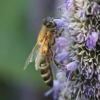

Class bee 99.6%
Class honeycomb 0.1%
Class cicada 0.0%
Class apiary 0.0%
Class fly 0.0%
--------------------------------


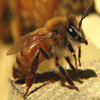

Class bee 93.4%
Class tarantula 2.3%
Class fly 0.8%
Class honeycomb 0.3%
Class apiary 0.2%
--------------------------------


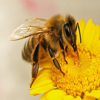

Class bee 94.5%
Class fly 0.8%
Class tarantula 0.4%
Class honeycomb 0.4%
Class apiary 0.1%
--------------------------------


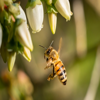

Class bee 85.3%
Class long-horned beetle 2.0%
Class honeycomb 1.8%
Class weevil 0.8%
Class leaf beetle 0.8%
--------------------------------


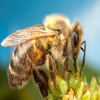

Class bee 94.1%
Class tarantula 0.7%
Class fly 0.6%
Class honeycomb 0.2%
Class apiary 0.1%
--------------------------------


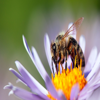

Class bee 95.0%
Class fly 3.8%
Class dragonfly 0.1%
Class ant 0.1%
Class honeycomb 0.1%
--------------------------------


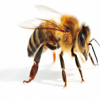

Class bee 84.2%
Class tarantula 13.8%
Class honeycomb 0.6%
Class apiary 0.2%
Class barn spider 0.1%
--------------------------------


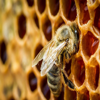

Class bee 90.7%
Class honeycomb 6.5%
Class apiary 0.9%
Class tarantula 0.4%
Class cicada 0.3%
--------------------------------


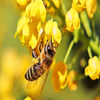

Class bee 99.0%
Class fly 0.4%
Class rapeseed 0.2%
Class honeycomb 0.1%
Class apiary 0.0%
--------------------------------
Top-1 accuracy - 0.92
Top-5 accuracy - 1.0
Time 5.04
Memory 4123.53 bytes


In [52]:
start = time.time()
count1, count5 = 0, 0
for imgPath in imagePaths:
  # img = read_image(imgPath)
  img_open = Image.open(imgPath).convert('RGB')
  display(img_open.resize((100, 100)))

  categories, top5_catid, top5_prob = recogGLN(imgPath)
  for i in range(top5_prob.size(0)):
    if i == 0 and categories[top5_catid[i]] in imgPath:
      count1 += 1
      count5 += 1
    elif categories[top5_catid[i]] in imgPath:
      count5 += 1
    print(f"Class {categories[top5_catid[i]]} {100 * top5_prob[i].item():.1f}%")
  print("--------------------------------")

print('Top-1 accuracy -', count1 / 50)
print('Top-5 accuracy -', count5 / 50)
print(f"Time {time.time() - start:.2f}")
print(f"Memory {memory_usage()[0]:.2f} bytes")